In [128]:
%matplotlib notebook
import numpy as np
import struct
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [164]:
df = open('250625171028-WRO.sps', 'rb')

# Reference datetime. Something fishy about excel's date format...
dt0 = datetime.datetime(1899, 12, 30, 0, 0)

# Read header
version = df.read(10).decode("utf-8")
[start] = struct.unpack('d', df.read(8))
start = dt0 + datetime.timedelta(days=start)
[end] = struct.unpack('d', df.read(8))
end = dt0 + datetime.timedelta(days=end)
[latitude] = struct.unpack('d', df.read(8))
[longitude] = struct.unpack('d', df.read(8))
[chartmax] = struct.unpack('d', df.read(8))
[chartmin] = struct.unpack('d', df.read(8))
[timezone] = struct.unpack('h', df.read(2))
source = df.read(10).decode("utf-8")
author = df.read(20).decode("utf-8")
name = df.read(20).decode("utf-8")
location = df.read(40).decode("utf-8")
[channels] = struct.unpack('h', df.read(2))
[notelength] = struct.unpack('i', df.read(4))

# TODO: manually decode using end bytes as newlines
note = df.read(notelength).decode('utf-8', 'backslashreplace')
note = note.split(sep='\\xff')
# TODO: this is hard coded based on example. Make more robust.
minf = float(note[1][4:])
maxf = float(note[2][3:])

data = []
# I switched to this loop because our data had a straggling byte for some reason
while True:
    try:
        data.append(struct.unpack('>H', df.read(2)))
    except:
        break

# diter = struct.iter_unpack('>H', df.read(-1))
# data = []
# for i in diter:
#     data.append(i[0])

df.close()

# TODO: file definition allows for interleaved polarizations, but example file only had one pol. Need to account for this
data = np.array(data)
data = data.reshape(-1, channels + 1)


In [170]:
note

['*[[*SWEEPS7580',
 'LOWF16000000',
 'HIF24000000',
 'STEPS512',
 'DUALSPECFILEFalse',
 'ADCRES4095',
 'BANNER0<DATE>',
 'BANNER1<DATE>',
 'ANTENNATYPEunknown',
 'ANTENNAAZIMUTH 180',
 'ANTENNAELEVATION 90',
 'ANTENNAPOLARIZATION0',
 'RCVR7',
 'COLORFILEAJ4CO_Rainbow.txt',
 'COLOROFFSET0 661869',
 'COLORGAIN0 1',
 '*]]*']

<IPython.core.display.Javascript object>


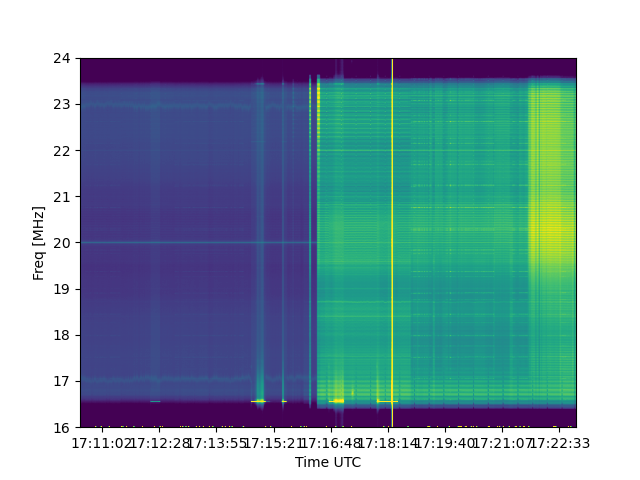

Text(0, 0.5, 'Freq [MHz]')

In [168]:
plt.figure()
plt.imshow(data.T, vmin=0, vmax=2000, origin='lower',
           extent=[mdates.date2num(start), mdates.date2num(end), minf*1e-6, maxf*1e-6], aspect='auto')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xlabel('Time UTC')
plt.ylabel('Freq [MHz]')